In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

In [26]:
# import file
data = pd.read_csv("Parking_Tickets.csv")
data

/tmp/ipython-input-1347677762.py:2: DtypeWarning: Columns (1,4,5,7,8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Parking_Tickets.csv")


,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,WaiverRequestDate,WaiverGrantedDate,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus,Location,LicensePlateAnon,WaiverStatus
0,1,69692,2015/10/30 04:00:00+00,W WATER ST,9:58,100,NJ,NaN,NaN,NaN,NaN,Void,NaN,100 W WATER ST,23644,NaN
1,2,0880773,2022/01/27 05:00:00+00,14TH ST NW,09:35,22,MA,NaN,NaN,NaN,NaN,Curb Painted Yellow,NaN,22 14TH ST NW,11385,NaN
2,3,0881106,2022/07/27 04:00:00+00,5TH ST SW,12:21,100,VA,NaN,NaN,NaN,NaN,Void,NaN,100 5TH ST SW,118148,NaN
3,4,0881858,2022/10/13 04:00:00+00,JEFFERSON PARK AVE,11:00,1700,VA,NaN,NaN,NaN,NaN,No Parking any time,NaN,1700 JEFFERSON PARK AVE,142588,NaN
4,5,0888128,2021/06/29 04:00:00+00,1ST ST S,08:52,100,VA,NaN,NaN,NaN,NaN,Void,NaN,100 1ST ST S,119700,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506306,506307,99998805,2004/01/26 05:00:00+00,MADISON AV,0243,233,WA,NaN,NaN,NaN,NaN,LT Side to Curb,NaN,233 MADISON AV,215109,NaN
506307,506308,99999901,2002/09/30 04:00:00+00,WATER ST LOT,1103,100,VA,NaN,NaN,NaN,NaN,Violation of Meter Ordinance,NaN,100 WATER ST LOT,110834,NaN
506308,506309,99999901,2021/08/02 04:00:00+00,7TH ST NE,09:00,120,WI,NaN,NaN,NaN,NaN,15ft of Fire Hydrant,NaN,120 7TH ST NE,215304,NaN
506309,506310,99999902,2021/08/02 04:00:00+00,7TH ST NE,09:01,100,WI,NaN,NaN,NaN,NaN,No Parking any time,NaN,100 7TH ST NE,215304,NaN


In [27]:
# Convert 'DateIssued' to datetime objects, coercing errors
data['DateIssued'] = pd.to_datetime(data['DateIssued'], errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['DateIssued'], inplace=True)

# Function to fix time format (handle cases with or without colon)
def fix_time_format(time_str):
    if pd.isna(time_str):
        return None
    time_str = str(time_str)
    if ':' not in time_str:
        if len(time_str) == 4:
            return time_str[:2] + ':' + time_str[2:]
        elif len(time_str) == 3:
            return time_str[:1] + ':' + time_str[1:]
        else:
            return time_str  # Return as is if not 3 or 4 digits without a colon
    return time_str

# Apply the function to the 'TimeIssued' column
data['TimeIssued'] = data['TimeIssued'].apply(fix_time_format)

# Drop rows with no appeal data (where both AppealDate and AppealGrantedDate are null)
data.dropna(subset=['AppealDate', 'AppealGrantedDate', 'AppealStatus'], how='any', inplace=True)

# Drop specified columns
data.drop(columns=['RecordID', 'TicketNumber', 'WaiverRequestDate', 'WaiverGrantedDate', 'LicensePlateAnon', 'WaiverStatus', 'StreetName', 'Location', 'StreetNumber'], inplace=True)

# Display the cleaned data
display(data.head())

,DateIssued,TimeIssued,LicenseState,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus
5,2021-07-21 04:00:00+00:00,09:20,VA,08/12/2021,08/20/2021,Curb Painted Yellow,granted
13,2013-04-26 04:00:00+00:00,17:17,VA,05/08/2013,05/08/2013,No Parking any time,granted
17,2013-04-27 04:00:00+00:00,13:35,VA,05/16/2013,05/16/2013,No Parking any time,granted
21,2015-10-30 04:00:00+00:00,17:01,VA,11/24/2015,11/24/2015,Permit Zone w/o Permit,granted
22,2015-10-30 04:00:00+00:00,17:04,VA,11/10/2015,11/10/2015,Permit Zone w/o Permit,granted


In [28]:
# Combine 'DateIssued' and 'TimeIssued' into a single datetime column
# Convert 'TimeIssued' to string and handle potential NaN values before combining
data['TimeIssued_str'] = data['TimeIssued'].astype(str).replace('nan', '')
data['DateTimeIssued'] = pd.to_datetime(data['DateIssued'].astype(str) + ' ' + data['TimeIssued_str'], errors='coerce')

# Drop the temporary 'TimeIssued_str' column and the original date and time columns
data.drop(columns=['TimeIssued_str', 'DateIssued', 'TimeIssued'], inplace=True)

# Display the updated data with the new datetime column
display(data.head())

/tmp/ipython-input-3904448213.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTimeIssued'] = pd.to_datetime(data['DateIssued'].astype(str) + ' ' + data['TimeIssued_str'], errors='coerce')


,LicenseState,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus,DateTimeIssued
5,VA,08/12/2021,08/20/2021,Curb Painted Yellow,granted,2021-07-21 09:20:00+00:00
13,VA,05/08/2013,05/08/2013,No Parking any time,granted,2013-04-26 17:17:00+00:00
17,VA,05/16/2013,05/16/2013,No Parking any time,granted,2013-04-27 13:35:00+00:00
21,VA,11/24/2015,11/24/2015,Permit Zone w/o Permit,granted,2015-10-30 17:01:00+00:00
22,VA,11/10/2015,11/10/2015,Permit Zone w/o Permit,granted,2015-10-30 17:04:00+00:00


In [29]:
# Create time-based features
data['DayOfWeek'] = data['DateTimeIssued'].dt.dayofweek  # Monday=0, Sunday=6
data['Month'] = data['DateTimeIssued'].dt.month
data['Hour'] = data['DateTimeIssued'].dt.hour

# Display the updated data with the new time-based features
display(data.head())

,LicenseState,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus,DateTimeIssued,DayOfWeek,Month,Hour
5,VA,08/12/2021,08/20/2021,Curb Painted Yellow,granted,2021-07-21 09:20:00+00:00,2.0,7.0,9.0
13,VA,05/08/2013,05/08/2013,No Parking any time,granted,2013-04-26 17:17:00+00:00,4.0,4.0,17.0
17,VA,05/16/2013,05/16/2013,No Parking any time,granted,2013-04-27 13:35:00+00:00,5.0,4.0,13.0
21,VA,11/24/2015,11/24/2015,Permit Zone w/o Permit,granted,2015-10-30 17:01:00+00:00,4.0,10.0,17.0
22,VA,11/10/2015,11/10/2015,Permit Zone w/o Permit,granted,2015-10-30 17:04:00+00:00,4.0,10.0,17.0


In [30]:
# Convert 'AppealDate' to datetime objects
data['AppealDate'] = pd.to_datetime(data['AppealDate'], errors='coerce')

# Remove timezone information from 'DateTimeIssued' to match 'AppealDate'
data['DateTimeIssued'] = data['DateTimeIssued'].dt.tz_convert(None)


# Calculate the appeal delay in days
data['AppealDelayDays'] = (data['AppealDate'] - data['DateTimeIssued']).dt.days

# Display the updated data with the new AppealDelayDays column
display(data.head())

,LicenseState,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus,DateTimeIssued,DayOfWeek,Month,Hour,AppealDelayDays
5,VA,2021-08-12,08/20/2021,Curb Painted Yellow,granted,2021-07-21 09:20:00,2.0,7.0,9.0,21.0
13,VA,2013-05-08,05/08/2013,No Parking any time,granted,2013-04-26 17:17:00,4.0,4.0,17.0,11.0
17,VA,2013-05-16,05/16/2013,No Parking any time,granted,2013-04-27 13:35:00,5.0,4.0,13.0,18.0
21,VA,2015-11-24,11/24/2015,Permit Zone w/o Permit,granted,2015-10-30 17:01:00,4.0,10.0,17.0,24.0
22,VA,2015-11-10,11/10/2015,Permit Zone w/o Permit,granted,2015-10-30 17:04:00,4.0,10.0,17.0,10.0


In [31]:
# Remove leading and trailing spaces from 'ViolationDescription'
data['ViolationDescription'] = data['ViolationDescription'].str.strip()

# Replace 'Overtime Parking ' with 'Overtime Parking' in the 'ViolationDescription' column
data['ViolationDescription'] = data['ViolationDescription'].replace('Overtime Parking ', 'Overtime Parking')


# Display the value counts of 'ViolationDescription' to check for other duplicates
display(data['ViolationDescription'].value_counts())

,count
ViolationDescription,
Overtime Parking,6709
Permit Zone w/o Permit,6223
No City License,4030
No Parking any time,3147
Handicapped Space,2256
Violation of Meter Ordinance,1946
Parking on Sidewalk/Blocking Sidewalk,793
LT Side to Curb,704
Other,635


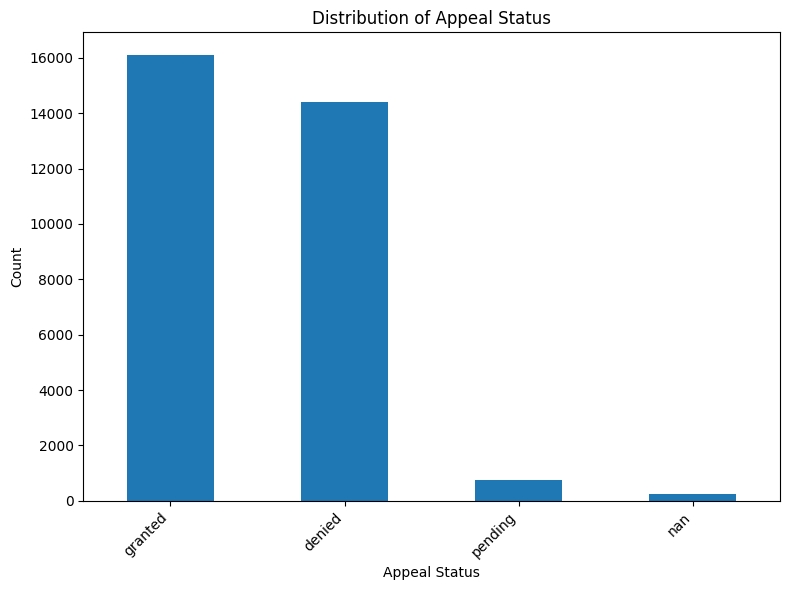

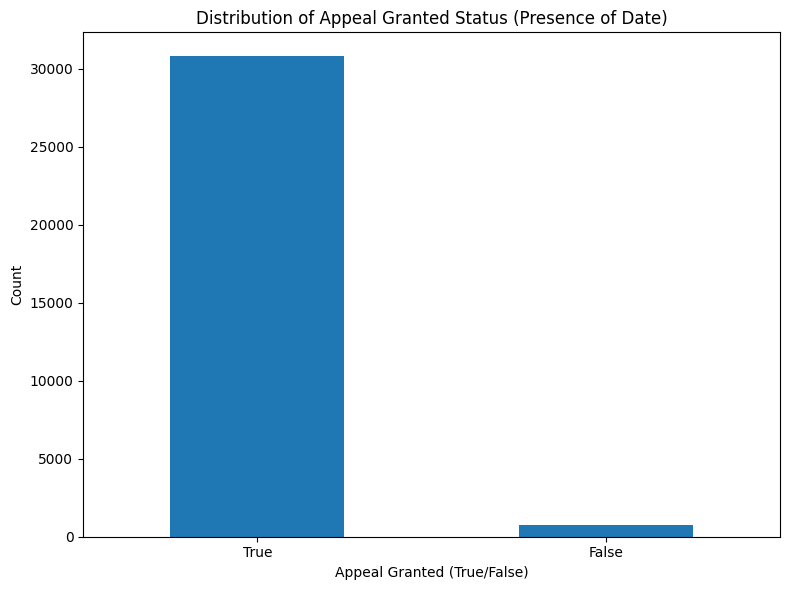

In [18]:
# Explore the 'AppealStatus' column
plt.figure(figsize=(8, 6))
data['AppealStatus'].value_counts(dropna=False).plot(kind='bar')
plt.title('Distribution of Appeal Status')
plt.xlabel('Appeal Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Explore the 'AppealGrantedDate' column (check for non-null values)
plt.figure(figsize=(8, 6))
data['AppealGrantedDate'].notna().value_counts().plot(kind='bar')
plt.title('Distribution of Appeal Granted Status (Presence of Date)')
plt.xlabel('Appeal Granted (True/False)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Top 10 Most Common Violation Descriptions:


,count
ViolationDescription,
Overtime Parking,6907
Permit Zone w/o Permit,6348
No City License,4303
No Parking any time,3250
Handicapped Space,2302
Violation of Meter Ordinance,2002
Parking on Sidewalk/Blocking Sidewalk,808
LT Side to Curb,723
Other,646


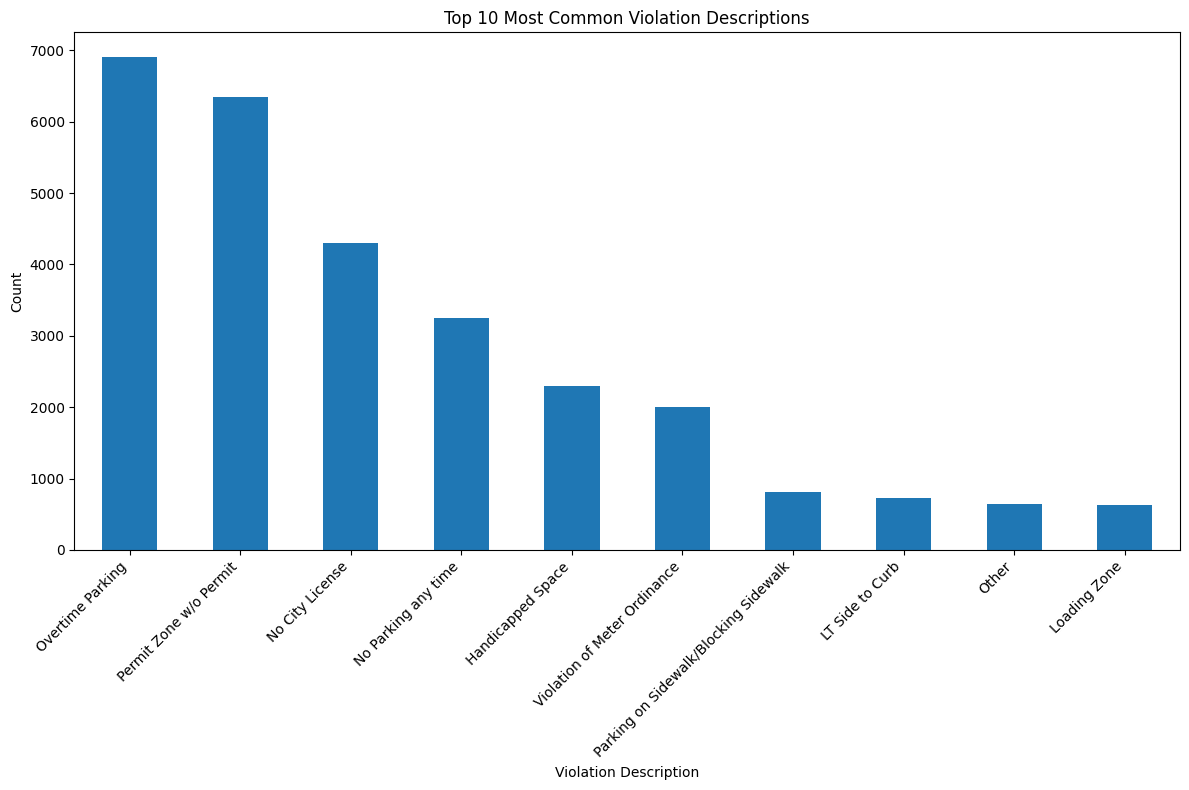

In [23]:
# Get the value counts of 'ViolationDescription'
violation_counts = data['ViolationDescription'].value_counts()

# Display the top 10 most common violation descriptions
print("Top 10 Most Common Violation Descriptions:")
display(violation_counts.head(10))

# Plot the top 10 most common violation descriptions
plt.figure(figsize=(12, 8))
violation_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Violation Descriptions')
plt.xlabel('Violation Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# Apply one-hot encoding to the 'ViolationDescription' column
violation_description_encoded = pd.get_dummies(data['ViolationDescription'], prefix='Violation')

# Concatenate the new encoded columns with the original DataFrame
data = pd.concat([data, violation_description_encoded], axis=1)

# Drop the original 'ViolationDescription' column as it's no longer needed
data.drop(columns=['ViolationDescription'], inplace=True)

# Display the updated data with the one-hot encoded columns
display(data.head())

,LicenseState,AppealDate,AppealGrantedDate,AppealStatus,DateTimeIssued,DayOfWeek,Month,Hour,AppealDelayDays,Violation_12 Inches From Curb,...,Violation_Other,Violation_Overtime Parking,Violation_Parking 20ft of Intersection,Violation_Parking on Sidewalk,Violation_Parking on Sidewalk/Blocking Sidewalk,Violation_Permit Zone w/o Permit,Violation_Prohibited Zone,Violation_Violation of Meter Ordinance,Violation_Void,Violation_Warning
5,VA,2021-08-12,08/20/2021,granted,2021-07-21 09:20:00,2.0,7.0,9.0,21.0,False,...,False,False,False,False,False,False,False,False,False,False
13,VA,2013-05-08,05/08/2013,granted,2013-04-26 17:17:00,4.0,4.0,17.0,11.0,False,...,False,False,False,False,False,False,False,False,False,False
17,VA,2013-05-16,05/16/2013,granted,2013-04-27 13:35:00,5.0,4.0,13.0,18.0,False,...,False,False,False,False,False,False,False,False,False,False
21,VA,2015-11-24,11/24/2015,granted,2015-10-30 17:01:00,4.0,10.0,17.0,24.0,False,...,False,False,False,False,False,True,False,False,False,False
22,VA,2015-11-10,11/10/2015,granted,2015-10-30 17:04:00,4.0,10.0,17.0,10.0,False,...,False,False,False,False,False,True,False,False,False,False


In [33]:
# Save the processed data to a CSV file
data.to_csv('processed_parking_tickets.csv', index=False)
print("Processed data saved to 'processed_parking_tickets.csv'")

Processed data saved to 'processed_parking_tickets.csv'
